## **Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#text-preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import WordNetLemmatizer, PorterStemmer

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb

## **Reading the dataset and analyzing it**

In [2]:
cancer_data = pd.read_csv('/content/sample_data/Cancer data.csv', encoding = 'latin')

In [3]:
cancer_data.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [4]:
cancer_data.isna().sum()

Unnamed: 0    0
0             0
a             0
dtype: int64

In [5]:
cancer_data.describe()

,Unnamed: 0
count,7570.000000
mean,3784.500000
std,2185.415102
min,0.000000
25%,1892.250000
50%,3784.500000
75%,5676.750000
max,7569.000000


In [6]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB


In [7]:
cancer_data['0'].value_counts()

Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: 0, dtype: int64

## **Split the data to train, test**

In [8]:
#split the columns to x,y
x = cancer_data['a']
y = cancer_data['0']

In [9]:
#using train test split to split the data to train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.3, random_state = 42)

## **Text Preprocessing**

In [10]:
#convert the text to lower case
def convert_to_lowercase(text):
    return text.lower()

#remove punctuations from the text
def remove_punctuations(text):
    eng_punctuation = string.punctuation
    translator = str.maketrans('','', eng_punctuation)
    return str(text).translate(translator)

#remove stopwords from the text
nltk.download('stopwords')
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return " ".join([word for word in str(text).split() if word not in stop_words])

#remove repeating characters, ex: aaa
def remove_repeating_characters(text):
    return re.sub(r'(.)1+', r'1', text)

#remove numeric text
def remove_numeric(text):
    return re.sub('[0-9]+', '', text)

#tokenizing the text
def tokenize_text(text):
    tokenizer = RegexpTokenizer('\w+')
    text = tokenizer.tokenize(text)
    return text

#lemmatizing the text. Converting some of the words to their root form
nltk.download('wordnet')
def text_lematization(text):
    lm = WordNetLemmatizer()
    text = [lm.lemmatize(word) for word in text]
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
#using all the function in one function named preprocess
def preprocess(text):
    #convert text to lowercase
    text = convert_to_lowercase(text)

    #remove punctuations
    text = remove_punctuations(text)

    #remove stopwords
    text = remove_stopwords(text)

    #remove repeating characters
    text = remove_repeating_characters(text)

    #remove numeric characters
    text = remove_numeric(text)

    #tokenize text
    text = tokenize_text(text)

    #lemmatize text
    text = text_lematization(text)

    #join tokens back into text
    text = " ".join(text)

    return text

In [12]:
#applying the function on the x_train, x_test
x_train = x_train.apply(preprocess)
x_test = x_test.apply(preprocess)

## **Using TfidfVectorizer**

In [13]:
vectorizer = TfidfVectorizer(max_features = 300000)

#fitting the tfidvectorizer
vectorizer.fit(x_train)
vectorizer.fit(x_test)

#transform the data
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

## **Using LabelEncoder for the y data**

In [15]:
y_test = LabelEncoder().fit_transform(y_test)
y_train = LabelEncoder().fit_transform(y_train)

## **Calling and training the XGBoost, Logistic Regression, Random Forest, SVM**

In [16]:
#logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
#random forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
#svm model
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
#xgboost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

## **Predicting the x_test data by the models**

In [17]:
#logistic regression model
logistic_pred = logistic_model.predict(x_test)
#random forest model
rf_pred = rf_model.predict(x_test)
#svm model
svm_pred = svm_model.predict(x_test)
#xgboost model
xgb_pred = xgb_model.predict(x_test)

## **Saving each model accuracy**

In [18]:
#logistic regression model
logistic_accuracy = accuracy_score(y_test, logistic_pred)
#random forest model
rf_accuracy = accuracy_score(y_test, rf_pred)
#svm model
svm_accuracy = accuracy_score(y_test, svm_pred)
#xgboost model
xgb_accuracy = accuracy_score(y_test, xgb_pred)

## **Visualize the models accuracies**

          Logistic Regression  Random Forest   SVM  XGBoost
Accuracy                 0.93           0.99  0.93     0.99


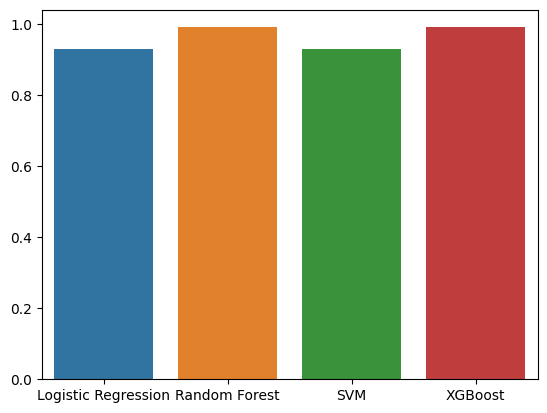

In [19]:
#dictionary with the model names and thier accuracy
_dict = {'Logistic Regression': logistic_accuracy,
         'Random Forest': rf_accuracy,
         'SVM': svm_accuracy,
         'XGBoost': xgb_accuracy}

#creating the dataframe using pandas
accuracy_data = pd.DataFrame(_dict, index = ['Accuracy']).round(2)
sns.barplot(accuracy_data)
print(accuracy_data)